# Euclidean Distance

https://en.wikipedia.org/wiki/Euclidean_distance

In [1]:
from math import sqrt

In [2]:
plot1 = [1,3]
plot2 = [2,5]

euclidean_distance = sqrt((plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2)
print(euclidean_distance)

2.23606797749979


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter
style.use("fivethirtyeight")

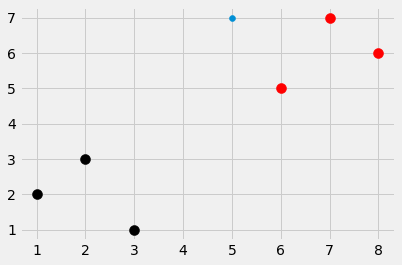

In [4]:
dataset = {"k":[[1,2],[2,3],[3,1]], "r": [[6,5],[7,7],[8,6]]}
new_features = [5,7]

for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1], s = 100, color = i)
plt.scatter(new_features[0], new_features[1])
plt.show()

# Code KNN from scratch

In [5]:
def k_nearest_neighbors(data, predict, k = 3):
    if len(data) >= k:
        warnings.warn("K is set to a value less than voting groups!")
    distance = []
    for group in data:
        for features in data[group]:
            # euclidean_distance = np.sqrt(np.sum((np.array(features)- np.array(predict))**2))
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distance.append([euclidean_distance, group])
            
    # Votes will eventually be in the form of [r, r, k]        
    votes = [i[1] for i in sorted(distance)[:k]]
    
    # print(votes)
    # The most frequent category is our result
    # print(Counter(votes))
    # print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]
    
    return vote_result

In [6]:
result = k_nearest_neighbors(dataset, new_features, k = 3)
print(result)

r


# Compare with sklearn

In [7]:
import random 
import pandas as pd

In [8]:
# Load
df = pd.read_csv("/Users/ericzhong/Desktop/Machine_Learning/sent_dex/breast_cancer/breast-cancer-wisconsin.data")
df.columns =['id', 'Clump_thickness', 'unif_cell_size', 'unif_cell_shape','marg_adhesion','single_epith_cell_size',
            'bare_nuclei','bland_chrom','norm_nucleoli','mitoses','class']

# Cleaning
df.replace("?", -99999, inplace = True)
df.drop(columns = ["id"], inplace = True)

df.head()

,Clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [9]:
full_data = df.astype(float).values.tolist()
# print(full_data[:5])

random.shuffle(full_data)
# print(20*"#")
# print(full_data[:5])

In [10]:
test_size = 0.2

train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}

train_data = full_data[:-int(test_size * len(full_data))] # first 80 percent as training data
test_data = full_data[-int(test_size * len(full_data)):] # last 20 percent as testing data

In [11]:
# Populate our trainng data and testing data
for i in train_data:
    train_set[i[-1]].append(i[:-1]) # last column of train_data is class, and it is also the key of train_set

for i in test_data:
    test_set[i[-1]].append(i[:-1]) # last column of train_data is class, and it is also the key of train_set

In [12]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k = 5)
        if group == vote:
            correct += 1
        total += 1

print("Accuracy:", correct / total)

Accuracy: 0.9712230215827338


# Accuracy and Confidence

Accuracy = Correct / Total

Confidence = Votes for Predicted Class / k

In [13]:
# For example, A:60% vs B:40%, A wins but not with a big lead 